In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

# ---------- 1) CONNECT ----------
# Tip: keep engine at module level so it isn't recreated each run
ENGINE = create_engine(
    "mssql+pyodbc://DESKTOP-M7FKHP9\\MSSQLSERVER01/DataWarehouse?"
    "driver=ODBC+Driver+17+for+SQL+Server"
)


Connecting and running query...
Data fetched: (30, 7) rows


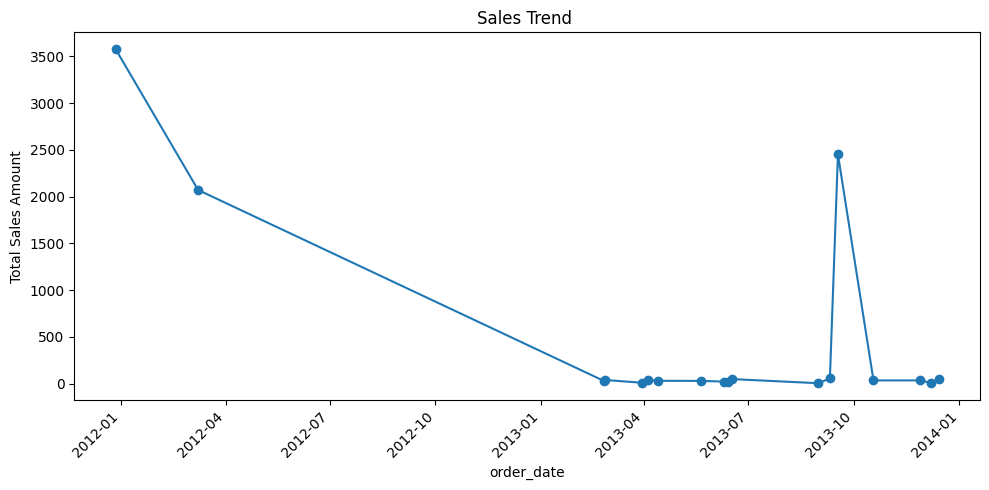

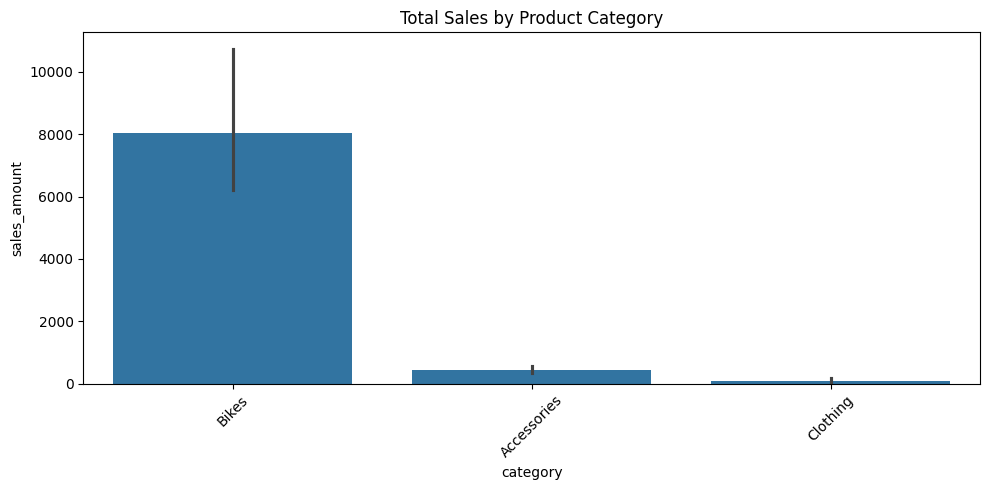

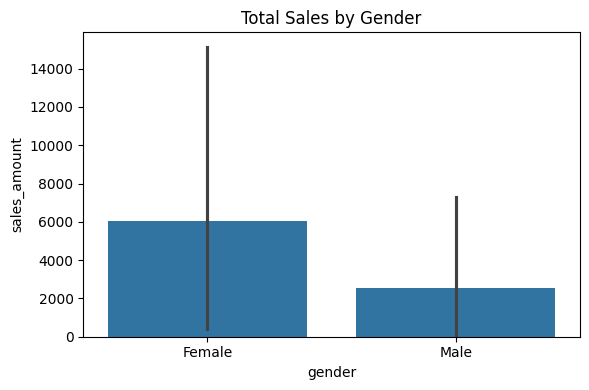

In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

# ---------- 1) CONNECT ----------
# Tip: keep engine at module level so it isn't recreated each run
ENGINE = create_engine(
    "mssql+pyodbc://DESKTOP-M7FKHP9\\MSSQLSERVER01/DataWarehouse?"
    "driver=ODBC+Driver+17+for+SQL+Server"
)

# ---------- 2) QUERY (JOIN GOLD TABLES) ----------
# Only fetch what we need + filter recent data to keep it fast

QUERY = """
SELECT TOP 30
    f.order_date,
    f.sales AS sales_amount,
    f.quantity,
    c.gender,
    c.marital_status,
    p.category,
    p.subcategory
FROM gold.fact_sales_tables AS f
JOIN gold.dim_cust_tables AS c
    ON f.customer_key = c.customer_key
JOIN gold.dim_prod_tables AS p
    ON f.product_key = p.product_key
"""

print("\nConnecting and running query...")
df = pd.read_sql(QUERY, ENGINE, parse_dates=['order_date'])
print("Data fetched:", df.shape, "rows")

# 3️⃣ Visualization 1 - Sales Trend Over Time
plt.figure(figsize=(10,5))
df.groupby('order_date')['sales_amount'].sum().plot(kind='line', marker='o')
plt.title('Sales Trend ')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_trend.png")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='category', y='sales_amount', data=df, estimator=sum)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_by_category.png")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='sales_amount', data=df, estimator=sum)
plt.title('Total Sales by Gender')
plt.tight_layout()
plt.savefig("sales_by_gender.png")
plt.show()





In [ ]:
query2 = """
select Top 10 * from gold.dim_prod_tables


"""
df = pd.read_sql(query2, ENGINE)
df

,product_key,product_id,product_number,product_name,category_id,category,subcategory,maintenance,cost,product_line,start_date
0,1,601,BB-7421,LL Bottom Bracket,CO_BB,Components,Bottom Brackets,Yes,24,N/A,2013-07-01
1,2,602,BB-8107,ML Bottom Bracket,CO_BB,Components,Bottom Brackets,Yes,45,N/A,2013-07-01
2,3,603,BB-9108,HL Bottom Bracket,CO_BB,Components,Bottom Brackets,Yes,54,N/A,2013-07-01
3,4,478,BC-M005,Mountain Bottle Cage,AC_BC,Accessories,Bottles and Cages,No,4,Mountain,2013-07-01
4,5,479,BC-R205,Road Bottle Cage,AC_BC,Accessories,Bottles and Cages,No,3,Road,2013-07-01
5,6,596,BK-M18B-40,Mountain-500 Black- 40,BI_MB,Bikes,Mountain Bikes,Yes,295,Mountain,2013-07-01
6,7,597,BK-M18B-42,Mountain-500 Black- 42,BI_MB,Bikes,Mountain Bikes,Yes,295,Mountain,2013-07-01
7,8,598,BK-M18B-44,Mountain-500 Black- 44,BI_MB,Bikes,Mountain Bikes,Yes,295,Mountain,2013-07-01
8,9,599,BK-M18B-48,Mountain-500 Black- 48,BI_MB,Bikes,Mountain Bikes,Yes,295,Mountain,2013-07-01
9,10,600,BK-M18B-52,Mountain-500 Black- 52,BI_MB,Bikes,Mountain Bikes,Yes,295,Mountain,2013-07-01


      category  Total_price
0  Accessories          160
1        Bikes         1120
2     Clothing          306


Text(0.5, 1.0, 'TotalPrice by Category')

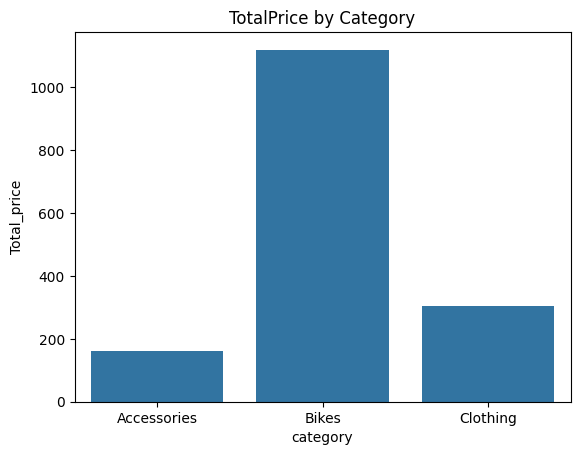

In [11]:
query2 = """
With cte as (
select Top 40 
pd.category,
pd.cost,
fs.order_date,
fs.sales,
fs.quantity,
fs.price
from gold.dim_prod_tables as pd
Left Join gold.fact_sales_tables as fs
on pd.product_key = fs.product_key)

select category,sum(price) as Total_price
from cte
group by category
"""

df = pd.read_sql(query2,ENGINE)
print(df)
plt.Figure(figsize=(10,5))
sns.barplot(x='category', y= 'Total_price', data=df)
plt.title("TotalPrice by Category")
